In [1]:
# importing the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,iplot
import cufflinks as cf

#manipulating the default plot size
# plt.rcParams['figure.figsize'] = 10,12
plt.rcParams['figure.figsize']=25,18
#Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#here we are binding plotly and pandas together so we can work on jupyter notebook bcoz plotly has its own library
pyo.init_notebook_mode(connected=True)
cf.go_offline() 

In [4]:
df = pd.read_csv('covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
df.rename(columns={'Country/Region':'Country'},inplace=True)

In [9]:
df.rename(columns={'Province/State':'State'},inplace=True)

In [10]:
df.head()

,SNo,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [11]:
df.tail()

,SNo,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0
306428,306429,05/29/2021,Zuid-Holland,Netherlands,2021-05-30 04:20:55,391559.0,4252.0,0.0


# Data Cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   State            228329 non-null  object 
 3   Country          306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [38]:
df.isnull().any(axis=0)

SNo                False
ObservationDate    False
State               True
Country            False
Last Update        False
Confirmed          False
Deaths             False
Recovered          False
dtype: bool

In [40]:
df.dropna(inplace=True)

In [41]:
df.isnull().any()

SNo                False
ObservationDate    False
State              False
Country            False
Last Update        False
Confirmed          False
Deaths             False
Recovered          False
dtype: bool

# Removing negative value from the confirmed column

In [44]:
df.loc[df['Confirmed']< 5 ]

,SNo,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306368,306369,05/29/2021,Unknown,Mainland China,2021-05-30 04:20:55,0.0,0.0,10.0
306369,306370,05/29/2021,Unknown,Mexico,2021-05-30 04:20:55,0.0,0.0,1924865.0
306371,306372,05/29/2021,Unknown,Peru,2021-05-30 04:20:55,0.0,0.0,1897522.0
306372,306373,05/29/2021,Unknown,Spain,2021-05-30 04:20:55,0.0,0.0,0.0


In [45]:
df=df[~(df['Confirmed']<0)]

In [46]:
df

,SNo,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228328 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              228328 non-null  int64  
 1   ObservationDate  228328 non-null  object 
 2   State            228328 non-null  object 
 3   Country          228328 non-null  object 
 4   Last Update      228328 non-null  object 
 5   Confirmed        228328 non-null  float64
 6   Deaths           228328 non-null  float64
 7   Recovered        228328 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 15.7+ MB


# Which country had the maximum number of cases?

In [48]:
df['Confirmed'] = df['Confirmed']
df['Country'] = df['Country']

In [49]:
m = pd.DataFrame(df.groupby(['Country']).sum()['Confirmed'])
m.head()

,Confirmed
Country,
Australia,9.447430e+06
Austria,2.000000e+00
Belgium,1.547341e+08
Brazil,2.649295e+09
Canada,1.934975e+08


# Visualizing the number of confirmed cases

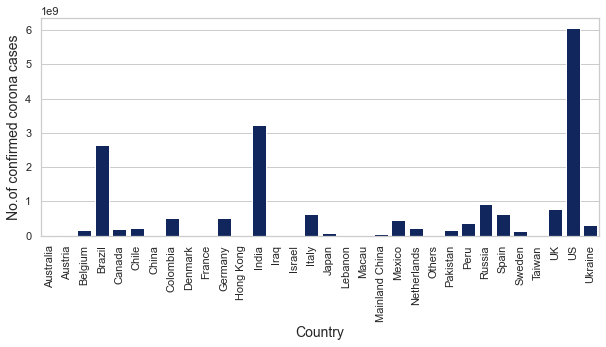

In [50]:
sns.barplot(x=m.index,y=m.Confirmed, data=pd.melt(m),color='#042069')
sns.set(rc={'figure.figsize':(10,4)})
sns.set_theme(style='whitegrid')
plt.xticks(rotation=90)
plt.xlabel('Country',size=14)
plt.ylabel('No.of confirmed corona cases',size=14)
plt.show()

# Which State in the world has max number of cases?

In [52]:
p = pd.DataFrame(df.groupby(['State','Country']).sum()['Confirmed'])
p.reset_index(inplace=True)
cases = p.sort_values(by='Confirmed',ascending=False).head(25)
cases

,State,Country,Confirmed
90,California,US,696898013.0
373,Maharashtra,India,681186928.0
176,England,UK,666227518.0
643,Texas,US,552039886.0
583,Sao Paulo,Brazil,521308945.0
189,Florida,US,429469197.0
441,New York,US,380636880.0
307,Karnataka,India,282256260.0
266,Illinois,US,263055187.0
24,Andhra Pradesh,India,254740494.0


# Plotting the state having higher no of cases of corona

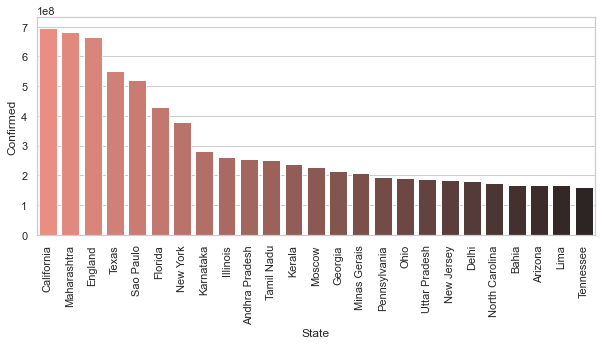

In [53]:
sns.barplot(x=cases['State'],y= cases.Confirmed, data=pd.melt(cases), palette='dark:salmon_r')
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(15,4)})
sns.set_theme(style='ticks')
plt.show()

# How many total deaths have been confirmed until now?

In [55]:
death = pd.DataFrame(df.groupby(['Country','State']).sum()['Deaths'])
death.reset_index(inplace=True)
death

,Country,State,Deaths
0,Australia,Australian Capital Territory,1257.0
1,Australia,Diamond Princess cruise ship,0.0
2,Australia,External territories,0.0
3,Australia,From Diamond Princess,0.0
4,Australia,Jervis Bay Territory,0.0
...,...,...,...
757,Ukraine,Vinnytsia Oblast,171216.0
758,Ukraine,Volyn Oblast,156312.0
759,Ukraine,Zakarpattia Oblast,230741.0
760,Ukraine,Zaporizhia Oblast,225346.0


Total no of deaths till now

In [57]:
df.Deaths.sum()

447832514.0

# Which country had the highest number of deaths?

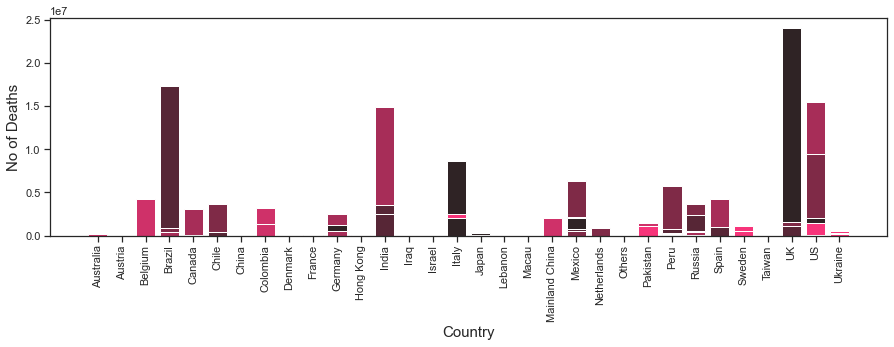

In [60]:
plt.bar(death['Country'],death['Deaths'],width=0.8,color=sns.dark_palette('#f7347a'))
plt.xticks(rotation='vertical')
plt.xlabel('Country', size=15)
plt.ylabel('No of Deaths', size=15)
plt.show()

There is high correlation between the no. of deaths and the number of confirmed cases of Corona around the world!

<AxesSubplot:>

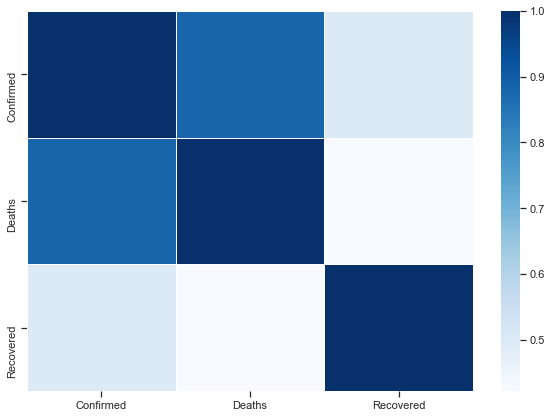

In [61]:
df.Confirmed.corr(df.Deaths)
mat = df[['Confirmed','Deaths','Recovered']].corr()
mat
#sns heatmap(mat, annot=True, cmap='winter')
plt.subplots(figsize=(10,7))
sns.heatmap(mat, cmap='Blues', linecolor='white', linewidths=1)

# which country had the best recovery rate?

In [62]:
df['confirmed'] = df['Confirmed']
df['Recovered'] = df['Recovered']

In [63]:
rec = pd.DataFrame(df[['Recovered','Confirmed']].value_counts(normalize=True)*100)
rec.reset_index(inplace=True)
rec.rename(columns = {0:'Rate'},inplace=True)
rec

,Recovered,Confirmed,Rate
0,0.0,0.0,1.296381
1,13.0,13.0,0.356943
2,0.0,1.0,0.302635
3,1.0,1.0,0.284240
4,18.0,18.0,0.231684
...,...,...,...
172495,15341.0,16055.0,0.000438
172496,15339.0,20059.0,0.000438
172497,15338.0,16322.0,0.000438
172498,15338.0,16243.0,0.000438


In [64]:
rec['Country'] = df['Country'].copy()
rec

,Recovered,Confirmed,Rate,Country
0,0.0,0.0,1.296381,Mainland China
1,13.0,13.0,0.356943,Mainland China
2,0.0,1.0,0.302635,Mainland China
3,1.0,1.0,0.284240,Mainland China
4,18.0,18.0,0.231684,Mainland China
...,...,...,...,...
172495,15341.0,16055.0,0.000438,Canada
172496,15339.0,20059.0,0.000438,Germany
172497,15338.0,16322.0,0.000438,UK
172498,15338.0,16243.0,0.000438,Brazil


In [66]:
rec = rec.groupby('Country').sum()
rec.reset_index(inplace=True)
rec[['Recovered','Confirmed']].value_counts(normalize=True)*100
rec

,Country,Recovered,Confirmed,Rate
0,Australia,100832513.0,1.920429e+08,1.666900
1,Austria,0.0,4.210000e+02,0.002190
2,Belgium,5091225.0,6.838785e+06,0.124820
3,Brazil,324377711.0,5.920654e+08,2.372902
4,Canada,185747456.0,3.591371e+08,2.410129
5,Chile,203445530.0,3.690010e+08,1.487772
6,China,160207.0,2.944500e+05,0.219859
7,Colombia,395415274.0,7.737749e+08,2.830139
8,Denmark,23230352.0,5.476551e+07,0.285992
9,France,121145228.0,2.338403e+08,1.346309


In [67]:
rec['Country']=rec['Country']

# Plotting the recovery rate across all countries

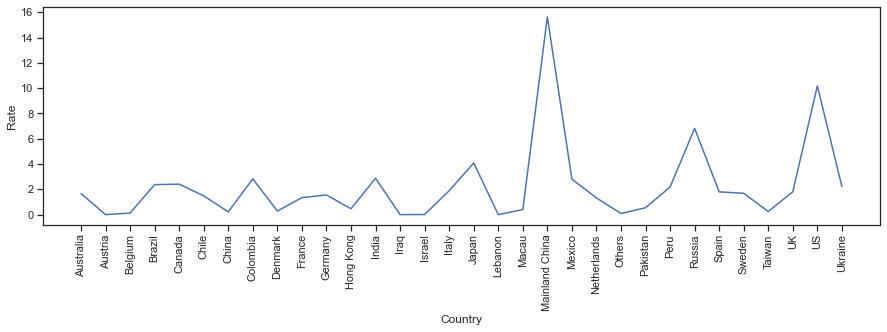

In [68]:
sns.lineplot(x=rec['Country'],y=rec.Rate,data=rec)
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
plt.show()

# Making the Prediction using FB Prophet

In [69]:
from fbprophet import Prophet

In [100]:
df.head(100)

,SNo,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered,confirmed
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.000,0.000,0.000,1.000
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.000,0.000,0.000,14.000
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.000,0.000,0.000,6.000
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.000,0.000,0.000,1.000
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.000,0.000,0.000,0.000
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.000,0.000,0.000,26.000
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.000,0.000,0.000,2.000
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.000,0.000,0.000,1.000
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.000,0.000,0.000,4.000
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.000,0.000,0.000,1.000


In [76]:
confirmed = df.groupby('ObservationDate').sum()['Confirmed'].reset_index()
deaths = df.groupby('ObservationDate').sum()['Deaths'].reset_index()
recovered = df.groupby('ObservationDate').sum()['Recovered'].reset_index()


In [77]:
confirmed.tail(10)

,ObservationDate,Confirmed
484,12/22/2020,54721406.0
485,12/23/2020,55221627.0
486,12/24/2020,55692782.0
487,12/25/2020,55983424.0
488,12/26/2020,56380322.0
489,12/27/2020,56705890.0
490,12/28/2020,57076708.0
491,12/29/2020,57570737.0
492,12/30/2020,58113454.0
493,12/31/2020,58621963.0


In [78]:
deaths.tail(10)

,ObservationDate,Deaths
484,12/22/2020,1232344.0
485,12/23/2020,1241927.0
486,12/24/2020,1250086.0
487,12/25/2020,1255683.0
488,12/26/2020,1260524.0
489,12/27/2020,1265153.0
490,12/28/2020,1271448.0
491,12/29/2020,1281967.0
492,12/30/2020,1292870.0
493,12/31/2020,1302312.0


In [79]:
recovered.tail(10)

,ObservationDate,Recovered
484,12/22/2020,26771162.0
485,12/23/2020,26931228.0
486,12/24/2020,27079868.0
487,12/25/2020,27223809.0
488,12/26/2020,27477834.0
489,12/27/2020,27617563.0
490,12/28/2020,27787903.0
491,12/29/2020,27983576.0
492,12/30/2020,28202934.0
493,12/31/2020,28329567.0


The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [80]:
confirmed.columns=['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [81]:
confirmed.head()

,ds,y
0,2021-01-01,58978033.0
1,2021-01-02,59484118.0
2,2021-01-03,59884700.0
3,2021-01-04,60289083.0
4,2021-01-05,60833257.0


In [82]:
confirmed.tail()

,ds,y
489,2020-12-27,56705890.0
490,2020-12-28,57076708.0
491,2020-12-29,57570737.0
492,2020-12-30,58113454.0
493,2020-12-31,58621963.0


# Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors

In [83]:
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format',lambda x: '%.3f'%x)

In [84]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=131)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [85]:
future.tail(100)

,ds
525,2021-06-30
526,2021-07-01
527,2021-07-02
528,2021-07-03
529,2021-07-04
530,2021-07-05
531,2021-07-06
532,2021-07-07
533,2021-07-08
534,2021-07-09


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals

In [86]:
#predicting the future with date, and upper and lower limit o f y value
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(100)

,ds,yhat,yhat_lower,yhat_upper
525,2021-06-30,127826652.757,123883316.874,131320353.613
526,2021-07-01,128279534.837,124123630.959,132426083.201
527,2021-07-02,128710477.725,124504769.081,132577208.531
528,2021-07-03,129111077.152,124446949.690,133142470.554
529,2021-07-04,129444379.894,124771629.593,133947151.662
530,2021-07-05,129825340.286,125172038.896,134282354.165
531,2021-07-06,130225277.748,125519040.119,134435440.456
532,2021-07-07,130662014.561,125855659.428,135320164.435
533,2021-07-08,131114896.640,126049543.509,135862491.722
534,2021-07-09,131545839.528,126071607.752,136644121.338


you can plot the forecast by calling the prophet.plot method and passing in your forecat dataframe

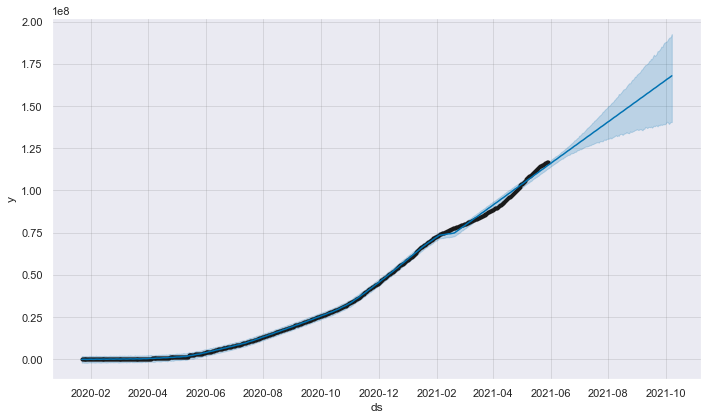

In [87]:
confirmed_forecast_plot = m.plot(forecast)

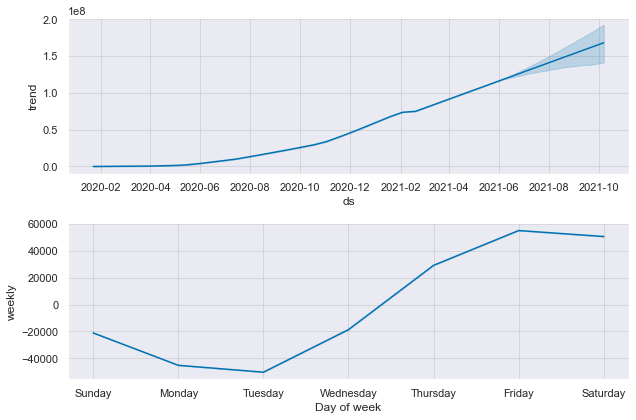

In [88]:
confirmed_forecast_plot = m.plot_components(forecast)

In [89]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [90]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=131)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
620,2021-10-03
621,2021-10-04
622,2021-10-05
623,2021-10-06
624,2021-10-07


In [92]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(100)

,ds,yhat,yhat_lower,yhat_upper
525,2021-06-30,2709896.552,2645094.492,2767967.198
526,2021-07-01,2719682.177,2654904.114,2776123.960
527,2021-07-02,2727664.833,2655591.751,2788890.676
528,2021-07-03,2734665.898,2663295.187,2800538.629
529,2021-07-04,2739745.022,2664290.587,2810742.215
530,2021-07-05,2745656.342,2665378.423,2816919.166
531,2021-07-06,2753600.212,2672791.900,2823089.354
532,2021-07-07,2762269.227,2679476.869,2836656.460
533,2021-07-08,2772054.852,2682531.162,2846526.024
534,2021-07-09,2780037.508,2691591.430,2863240.099


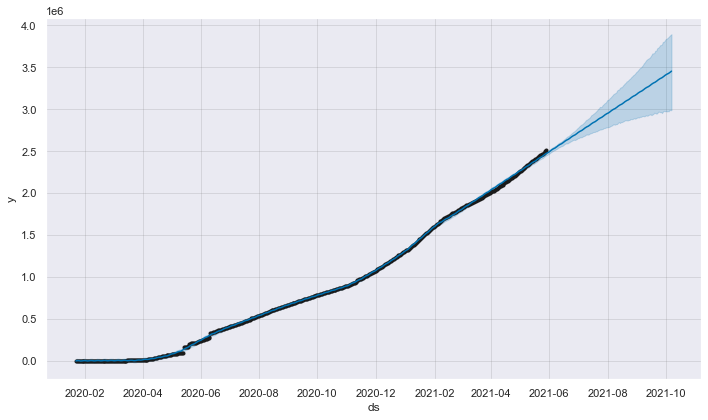

In [93]:
deaths_forecast_plot = m.plot(forecast)

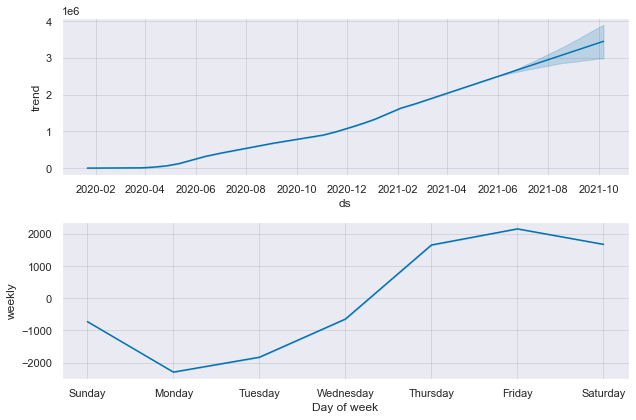

In [94]:
deaths_forecast_plot = m.plot_components(forecast)

# Forecasting Worldwide Recovered Cases with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [95]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [96]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=131)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
620,2021-10-03
621,2021-10-04
622,2021-10-05
623,2021-10-06
624,2021-10-07


In [97]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(100)

,ds,yhat,yhat_lower,yhat_upper
525,2021-06-30,68782403.492,65987260.975,71362398.006
526,2021-07-01,69074161.651,66354914.808,71862759.680
527,2021-07-02,69350682.293,66587486.936,72168655.187
528,2021-07-03,69645949.063,66833889.022,72404125.496
529,2021-07-04,69833182.581,67309951.038,72802239.928
530,2021-07-05,70117892.165,67166037.377,72776278.950
531,2021-07-06,70321709.405,67550851.828,73262351.525
532,2021-07-07,70625691.558,67840292.356,73884321.238
533,2021-07-08,70917449.718,68161229.054,73736176.217
534,2021-07-09,71193970.360,68224682.809,73897840.632


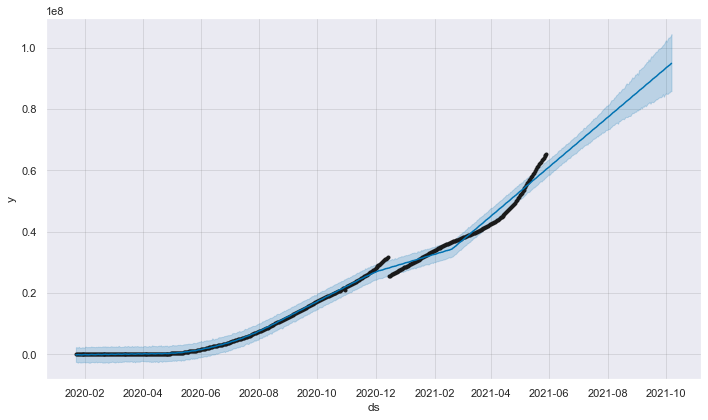

In [98]:
recovered_forecast_plot = m.plot(forecast)

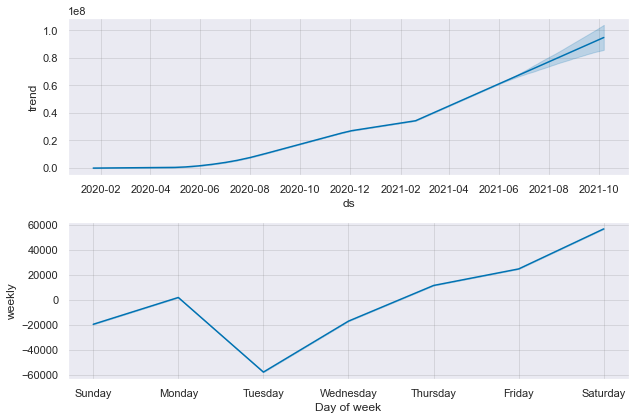

In [99]:
recovered_forecast_plot = m.plot_components(forecast)